In [ ]:
# connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installasi modul PM4PY
!pip install pm4py

     |████████████████████████████████| 1.1MB 7.0MB/s 
     |████████████████████████████████| 40.6MB 102kB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23553 sha256=6b3509177297a504caeca5bb8bbf03ba65f72240a197af1e982de89f39208cea
  Stored in directory: /root/.cache/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
Successfully built stringdist


In [ ]:
# Import library
import pandas as pd
import numpy as np
from datetime import date
from IPython.display import Image
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# Change directory folder
import os
os.chdir('drive/MyDrive/Belajar Proses Mining')

In [ ]:
# Import dataset with with pandas
event_df = pd.read_csv('data-cleansing.csv', low_memory=False)

# Display the top 5 records
event_df.head()

,CaseID,LABEL,Time_Stamps,Group_Activities,CTR_SIZE,CTR_TYPE,ORI_CTR_STATUS,GROSS,CUSTOMS_DEL_DOC_TYPE,FINAL_CTR_STATUS,CUSTOMS_BHD_DOC_TYPE,BHD_TYPE,CUSTOMS_PERMIT_DOC_TYPE
0,3042664,A,3/1/2015 7:40,berth discharge,40.0,DRY,FCL,10.0,NaN,NaN,NaN,NaN,NaN
1,3042664,B,3/1/2015 8:21,yard discharge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3042664,N,31/07/2015 10:23:45,delivery,NaN,NaN,NaN,NaN,SPPB,NaN,NaN,NaN,NaN
3,3042664,O,31/07/2015 19:21:52,delivery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3042664,P,31/07/2015 19:39:22,delivery,NaN,NaN,NaN,NaN,NaN,FCL,NaN,NaN,NaN


In [ ]:
# Slicing the colomns in the dataset
event_df[['CaseID', 'LABEL', 'Time_Stamps', 'Group_Activities']].head(10)

,CaseID,LABEL,Time_Stamps,Group_Activities
0,3042664,A,3/1/2015 7:40,berth discharge
1,3042664,B,3/1/2015 8:21,yard discharge
2,3042664,N,31/07/2015 10:23:45,delivery
3,3042664,O,31/07/2015 19:21:52,delivery
4,3042664,P,31/07/2015 19:39:22,delivery
5,3042795,A,2/1/2015 15:26,berth discharge
6,3042795,B,2/1/2015 15:39,yard discharge
7,3042795,N,31/07/2015 10:23:45,delivery
8,3042795,O,31/07/2015 20:35:47,delivery
9,3042795,P,31/07/2015 21:16:12,delivery


In [ ]:
event_df['Group_Activities'].unique()

array(['berth discharge', 'yard discharge', 'delivery',
       'customs behandle', 'quarantine behandle', 'rubah status FCL-LCL'],
      dtype=object)

In [ ]:
# Display the shape on the dataset
print('{} rows and {} columns.'.format(event_df.shape[0], event_df.shape[1]))

531581 rows and 13 columns.


In [ ]:
# Create a new dataframe
events = event_df[['CaseID', 'LABEL', 'Time_Stamps', 'Group_Activities']]

In [ ]:
# Display the top 10 records
events.head(10)

,CaseID,LABEL,Time_Stamps,Group_Activities
0,3042664,A,3/1/2015 7:40,berth discharge
1,3042664,B,3/1/2015 8:21,yard discharge
2,3042664,N,31/07/2015 10:23:45,delivery
3,3042664,O,31/07/2015 19:21:52,delivery
4,3042664,P,31/07/2015 19:39:22,delivery
5,3042795,A,2/1/2015 15:26,berth discharge
6,3042795,B,2/1/2015 15:39,yard discharge
7,3042795,N,31/07/2015 10:23:45,delivery
8,3042795,O,31/07/2015 20:35:47,delivery
9,3042795,P,31/07/2015 21:16:12,delivery


In [ ]:
# Change the column names in the dataset
events.rename(columns={'CaseID':'case',
                       'LABEL':'label',
                       'Time_Stamps':'datetime',
                       'Group_Activities':'activities'
                       }, inplace=True)

In [ ]:
# Display the top 5 records
events.head()

,case,label,datetime,activities
0,3042664,A,3/1/2015 7:40,berth discharge
1,3042664,B,3/1/2015 8:21,yard discharge
2,3042664,N,31/07/2015 10:23:45,delivery
3,3042664,O,31/07/2015 19:21:52,delivery
4,3042664,P,31/07/2015 19:39:22,delivery


In [ ]:
# Display the data type for each column
events.dtypes

case           int64
label         object
datetime      object
activities    object
dtype: object

In [ ]:
# change the data type in column datetime to datetime
events['datetime'] = pd.to_datetime(events['datetime'])

In [ ]:
# Display the data type for each column
events.dtypes

case                   int64
label                 object
datetime      datetime64[ns]
activities            object
dtype: object

In [ ]:
# Check missing value in the dataset
events.isna().sum()

case          0
label         0
datetime      0
activities    0
dtype: int64

In [ ]:
events.loc[events['label'].isna()]

,case,label,datetime,activities
330765,3880606,NaN,2015-08-22 18:59:57,berth discharge


In [ ]:
events.dropna(axis=0, how='any')

,case,label,datetime,activities
0,3042664,A,2015-03-01 07:40:00,berth discharge
1,3042664,B,2015-03-01 08:21:00,yard discharge
2,3042664,N,2015-07-31 10:23:45,delivery
3,3042664,O,2015-07-31 19:21:52,delivery
4,3042664,P,2015-07-31 19:39:22,delivery
...,...,...,...,...
531577,4025040,A,2015-09-30 09:30:23,berth discharge
531578,4025040,B,2015-09-30 09:44:46,yard discharge
531579,4025040,N,2015-09-30 13:24:28,delivery
531580,4025040,O,2015-09-30 13:52:43,delivery


In [ ]:
events.isna().sum()

case          0
label         1
datetime      0
activities    0
dtype: int64

In [ ]:
events.loc[events['label'].isna()]

,case,label,datetime,activities
330765,3880606,NaN,2015-08-22 18:59:57,berth discharge


In [ ]:
events.dropna(axis=0)

,case,label,datetime,activities
0,3042664,A,2015-03-01 07:40:00,berth discharge
1,3042664,B,2015-03-01 08:21:00,yard discharge
2,3042664,N,2015-07-31 10:23:45,delivery
3,3042664,O,2015-07-31 19:21:52,delivery
4,3042664,P,2015-07-31 19:39:22,delivery
...,...,...,...,...
531577,4025040,A,2015-09-30 09:30:23,berth discharge
531578,4025040,B,2015-09-30 09:44:46,yard discharge
531579,4025040,N,2015-09-30 13:24:28,delivery
531580,4025040,O,2015-09-30 13:52:43,delivery


In [ ]:
events.loc[events['label'].isna()]

,case,label,datetime,activities
330765,3880606,NaN,2015-08-22 18:59:57,berth discharge


In [ ]:
 ## Get the case start times to get the time deltas for the 'age' of each activity with respect to start
case_starts_ends = events.pivot_table(index='case', aggfunc={'datetime': ['min', 'max']})
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['case', 'caseend', 'casestart']
events = events.merge(case_starts_ends, on='case')
events['relativetime'] = events['datetime'] - events['casestart']
events.head(10)

,case,label,datetime,activities,caseend,casestart,relativetime
0,3042664,A,2015-03-01 07:40:00,berth discharge,2015-07-31 19:39:22,2015-03-01 07:40:00,0 days 00:00:00
1,3042664,B,2015-03-01 08:21:00,yard discharge,2015-07-31 19:39:22,2015-03-01 07:40:00,0 days 00:41:00
2,3042664,N,2015-07-31 10:23:45,delivery,2015-07-31 19:39:22,2015-03-01 07:40:00,152 days 02:43:45
3,3042664,O,2015-07-31 19:21:52,delivery,2015-07-31 19:39:22,2015-03-01 07:40:00,152 days 11:41:52
4,3042664,P,2015-07-31 19:39:22,delivery,2015-07-31 19:39:22,2015-03-01 07:40:00,152 days 11:59:22
5,3042795,A,2015-02-01 15:26:00,berth discharge,2015-07-31 21:16:12,2015-02-01 15:26:00,0 days 00:00:00
6,3042795,B,2015-02-01 15:39:00,yard discharge,2015-07-31 21:16:12,2015-02-01 15:26:00,0 days 00:13:00
7,3042795,N,2015-07-31 10:23:45,delivery,2015-07-31 21:16:12,2015-02-01 15:26:00,179 days 18:57:45
8,3042795,O,2015-07-31 20:35:47,delivery,2015-07-31 21:16:12,2015-02-01 15:26:00,180 days 05:09:47
9,3042795,P,2015-07-31 21:16:12,delivery,2015-07-31 21:16:12,2015-02-01 15:26:00,180 days 05:50:12


In [ ]:
events['label'] = events['label'].apply(lambda x: x)

In [ ]:
 delimiter = '___'

makeEventString = lambda x: delimiter.join(str(x))
makeEventString.__name__ = 'makeEventString'

numEvents = lambda x: len(x)
numEvents.__name__ = 'numEvents'


caselogs = events.pivot_table(index='case', aggfunc={'label': [makeEventString, numEvents]})
caselogs = caselogs.reset_index()
caselogs.columns = ['case', 'action_sequence', 'numactions']

events = pd.merge(events, caselogs, on='case')
events['caselength'] = events['caseend'] - events['casestart']

events.head()

,case,label,datetime,activities,caseend,casestart,relativetime,action_sequence,numactions,caselength
0,3042664,A,2015-03-01 07:40:00,berth discharge,2015-07-31 19:39:22,2015-03-01 07:40:00,0 days 00:00:00,0___ ___ ___ ___ ___A___\n___1___ ___ ___ ___ ...,5,152 days 11:59:22
1,3042664,B,2015-03-01 08:21:00,yard discharge,2015-07-31 19:39:22,2015-03-01 07:40:00,0 days 00:41:00,0___ ___ ___ ___ ___A___\n___1___ ___ ___ ___ ...,5,152 days 11:59:22
2,3042664,N,2015-07-31 10:23:45,delivery,2015-07-31 19:39:22,2015-03-01 07:40:00,152 days 02:43:45,0___ ___ ___ ___ ___A___\n___1___ ___ ___ ___ ...,5,152 days 11:59:22
3,3042664,O,2015-07-31 19:21:52,delivery,2015-07-31 19:39:22,2015-03-01 07:40:00,152 days 11:41:52,0___ ___ ___ ___ ___A___\n___1___ ___ ___ ___ ...,5,152 days 11:59:22
4,3042664,P,2015-07-31 19:39:22,delivery,2015-07-31 19:39:22,2015-03-01 07:40:00,152 days 11:59:22,0___ ___ ___ ___ ___A___\n___1___ ___ ___ ___ ...,5,152 days 11:59:22


In [ ]:
## Get day of week
events['weekday'] = events['datetime'].apply(lambda x: x.weekday())
events['date'] = events['datetime'].apply(lambda x: x.date())
events['startdate'] = events['casestart'].apply(lambda x: x.date())
events['hour'] = events['datetime'].apply(lambda x: x.time().hour)
## Get relative times in more friendly terms
events['relativetime_s'] = events['relativetime'].dt.seconds + 86400*events['relativetime'].dt.days
events['relativedays'] = events['relativetime'].dt.days

In [ ]:
events.head()

,case,label,datetime,activities,caseend,casestart,relativetime,action_sequence,numactions,caselength,weekday,date,startdate,hour,relativetime_s,relativedays
0,3042664,A,2015-03-01 07:40:00,berth discharge,2015-07-31 19:39:22,2015-03-01 07:40:00,0 days 00:00:00,0___ ___ ___ ___ ___A___\n___1___ ___ ___ ___ ...,5,152 days 11:59:22,6,2015-03-01,2015-03-01,7,0,0
1,3042664,B,2015-03-01 08:21:00,yard discharge,2015-07-31 19:39:22,2015-03-01 07:40:00,0 days 00:41:00,0___ ___ ___ ___ ___A___\n___1___ ___ ___ ___ ...,5,152 days 11:59:22,6,2015-03-01,2015-03-01,8,2460,0
2,3042664,N,2015-07-31 10:23:45,delivery,2015-07-31 19:39:22,2015-03-01 07:40:00,152 days 02:43:45,0___ ___ ___ ___ ___A___\n___1___ ___ ___ ___ ...,5,152 days 11:59:22,4,2015-07-31,2015-03-01,10,13142625,152
3,3042664,O,2015-07-31 19:21:52,delivery,2015-07-31 19:39:22,2015-03-01 07:40:00,152 days 11:41:52,0___ ___ ___ ___ ___A___\n___1___ ___ ___ ___ ...,5,152 days 11:59:22,4,2015-07-31,2015-03-01,19,13174912,152
4,3042664,P,2015-07-31 19:39:22,delivery,2015-07-31 19:39:22,2015-03-01 07:40:00,152 days 11:59:22,0___ ___ ___ ___ ___A___\n___1___ ___ ___ ___ ...,5,152 days 11:59:22,4,2015-07-31,2015-03-01,19,13175962,152


In [ ]:
event = events[['case','label','datetime']].copy()

In [ ]:
event.dtypes

case                 int64
label               object
datetime    datetime64[ns]
dtype: object

In [ ]:
print('**Minimum number of events per case**: {}'.format(min(events['case'].value_counts())))

**Minimum number of events per case**: 4


In [ ]:
#!pip install pm4py --user
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [ ]:
 eventlog = event.copy()
### Specify which columns correspond to case (case:concept:name), 
###event (concept:name) and timestamp (time:timestamp) - rename columns in accordance
###with pm4py

eventlog.rename(columns={'datetime': 'time:timestamp', 'case': 'case:concept:name', 'label': 'concept:name'}, inplace=True)

## Convert to log format
log = log_converter.apply(eventlog)

In [ ]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

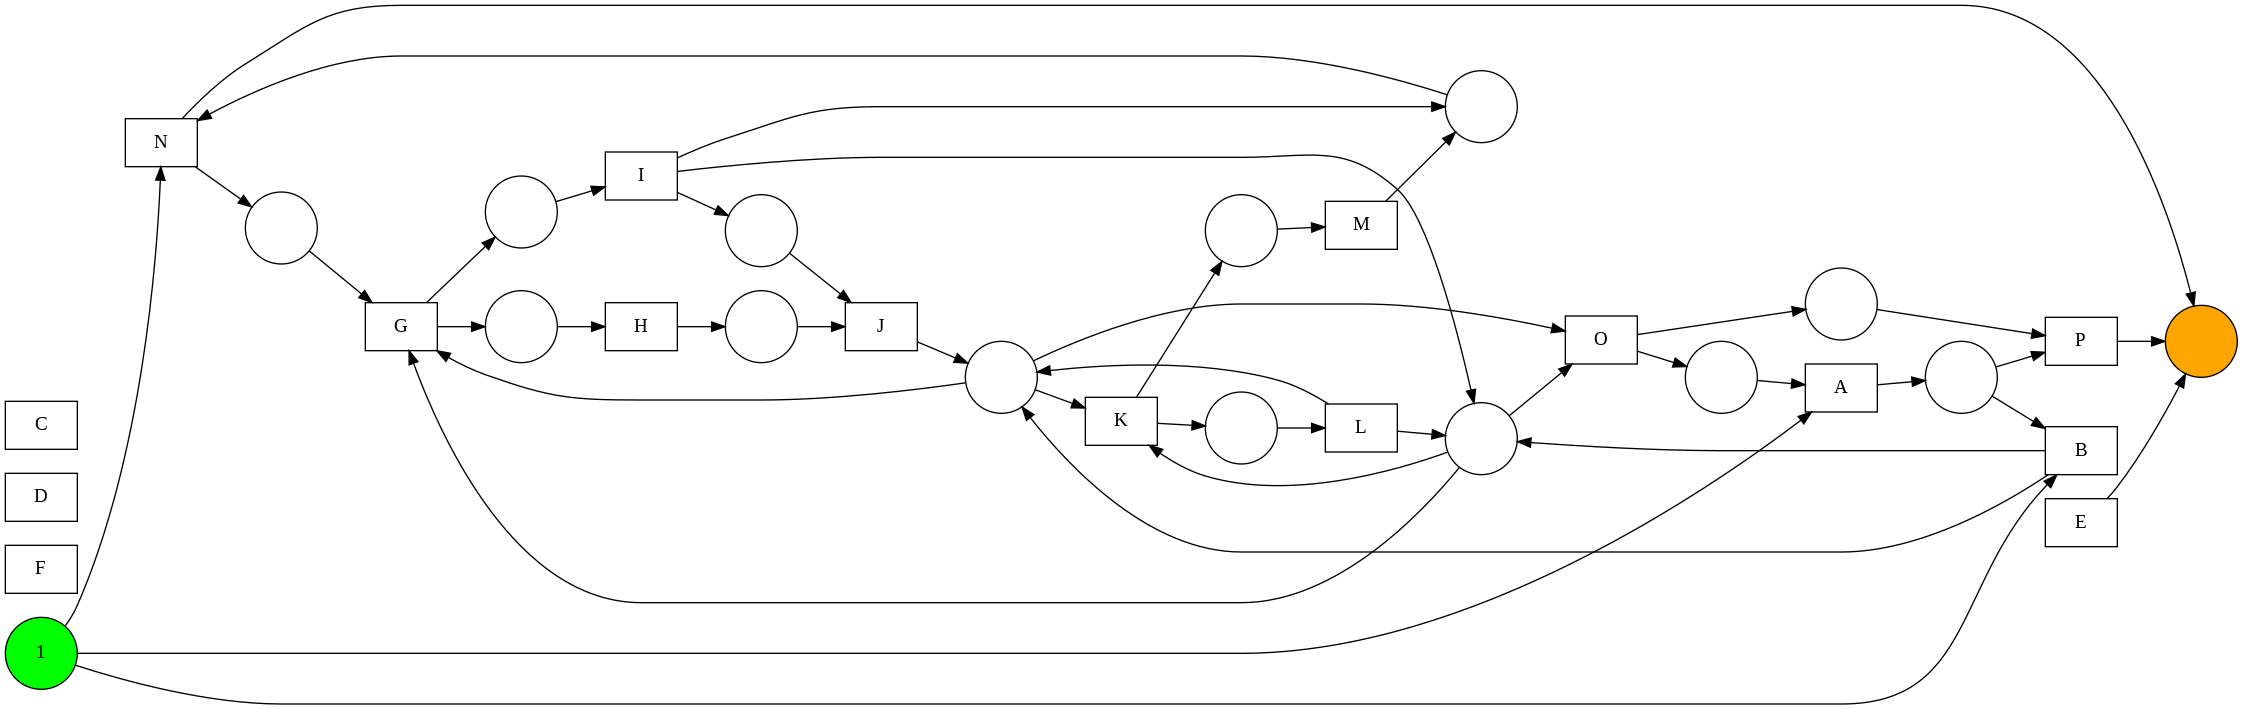

In [ ]:
# Visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
Image(pn_visualizer.view(gviz))

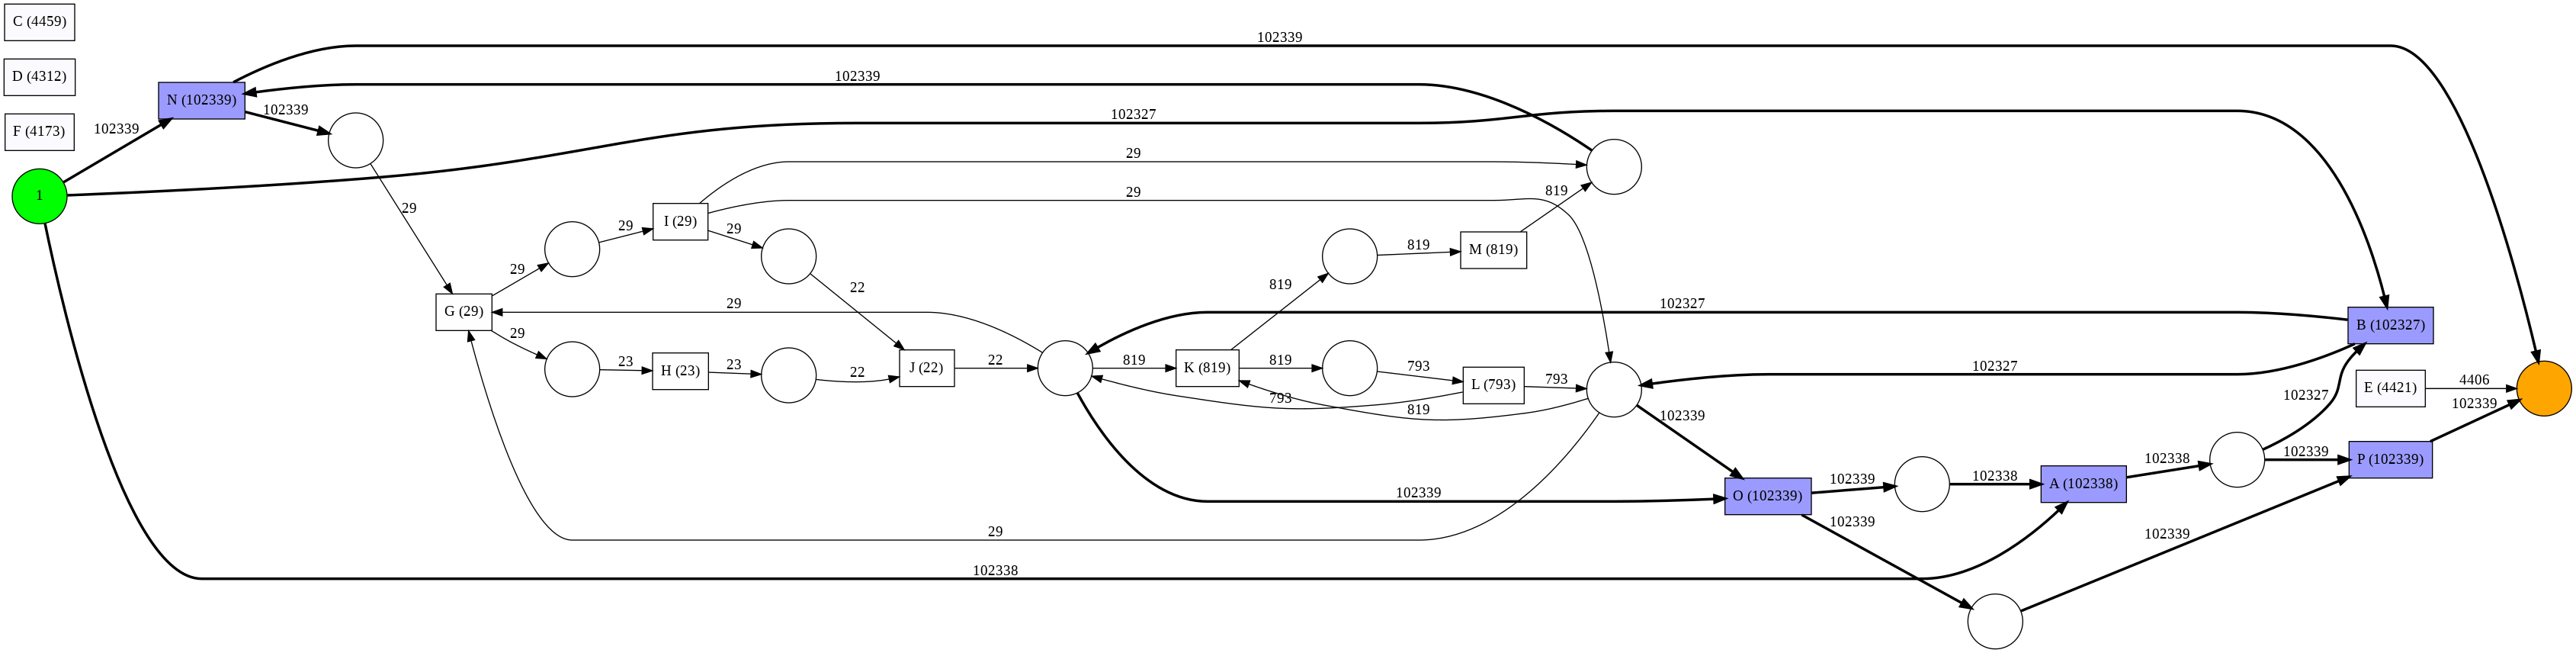

In [ ]:
# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

img = pn_visualizer.view(gviz)
Image(img)